In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import math 

from utils import get_time_diff_from_issue_df, get_count_from_issue_df, get_time_from_issue_df, iqr_outlier_filter, examine_data, extract_months

In [2]:
# Globals
pr_file = 'pr_data.csv'

In [3]:
pr_df = pd.read_csv(pr_file, parse_dates=['opened', 'reviewed', 'closed'], converters={'labels': lambda x: x.split('|')})

In [4]:
pd.set_option("display.max_rows", 70)
#pr_df.head(70)
pr_df.tail(70)
#examine_data(pr_df, 'pr_made', 'closed', 'large', rows=70, func=lambda x,y: x.head(y))

,issue_num,linked_issue,opened,reviewed,closed,review_count,labels
903,2003,1874.0,2021-07-23 03:43:15+00:00,2021-07-25 20:07:33+00:00,2021-07-30 03:49:51+00:00,2,"[role: front end, Size: Good second issue, P-F..."
904,2004,1943.0,2021-07-23 05:42:44+00:00,2021-07-24 04:22:30+00:00,2021-08-01 15:34:04+00:00,2,"[Size: Good first issue, role: front end, P-Fe..."
905,2005,1919.0,2021-07-24 04:23:12+00:00,2021-07-29 23:54:49+00:00,2021-08-03 07:39:03+00:00,4,"[role: front end, Size: Medium, Feature: Refac..."
906,2006,1956.0,2021-07-24 16:33:29+00:00,2021-07-28 03:59:39+00:00,2021-08-04 16:25:20+00:00,5,"[Size: Large, role: design, Feature: Board/Git..."
907,2011,1498.0,2021-07-26 17:54:23+00:00,2021-08-01 15:11:14+00:00,NaT,4,"[role: front end, Size: Medium, P-Feature: Abo..."
908,2012,1997.0,2021-07-27 01:13:13+00:00,2021-07-29 22:30:05+00:00,2021-08-03 03:06:15+00:00,3,"[role: front end, P-Feature: Project Info and ..."
909,2018,1818.0,2021-07-29 00:32:48+00:00,NaT,2021-07-29 00:34:30+00:00,0,[]
910,2019,1818.0,2021-07-29 01:24:32+00:00,2021-08-01 16:05:34+00:00,2021-08-02 07:10:51+00:00,3,"[Research, role: front end, Size: Medium, P-Fe..."
911,2022,1973.0,2021-07-30 22:45:11+00:00,2021-08-03 00:02:52+00:00,2021-08-03 04:55:33+00:00,2,"[role: front end, Size: Good second issue, P-F..."
912,2024,1733.0,2021-07-31 02:24:14+00:00,2021-08-04 02:15:50+00:00,2021-08-05 02:10:25+00:00,2,"[role: front end, Size: Medium, P-Feature: Sit..."


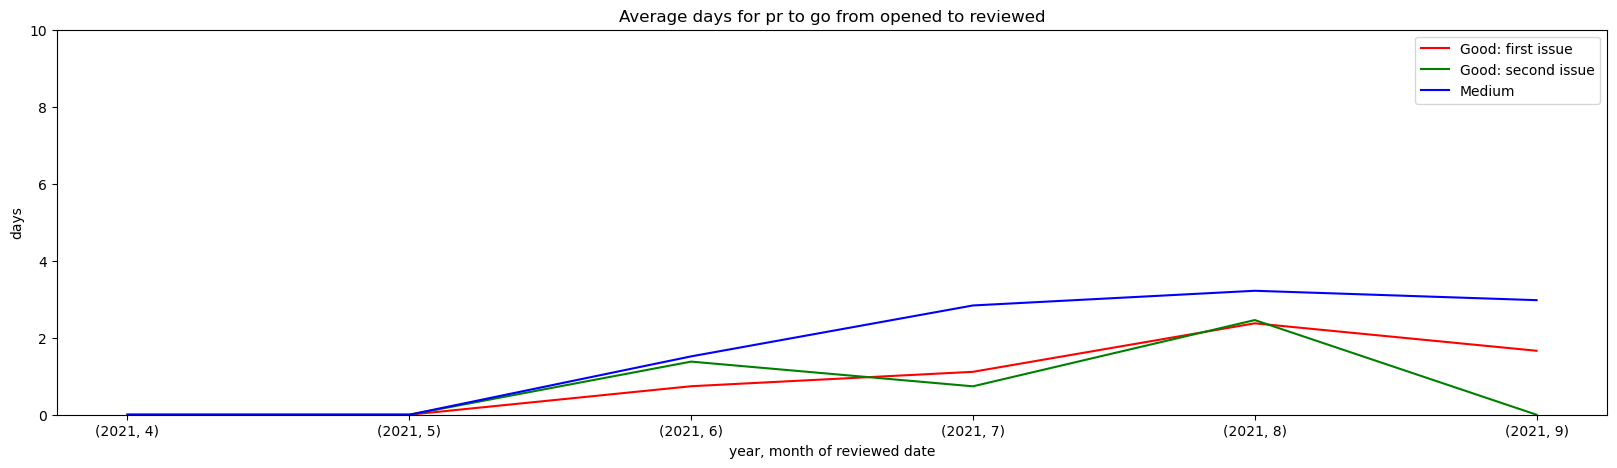

In [5]:
# Plotting
past_count = 6
base_round = 5
time1 = 'opened'
time2 = 'reviewed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
#x, y = get_time_diff_from_issue_df(pr_df, time1, time2, 'large', 'product')
#all_y.extend(y[-past_count:])
#plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for pr to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

In [6]:
col = 'review_count'
col1 = 'opened'

# Create a copy to avoid modifying the original
copy_df = pr_df.copy()

# Get all the months which will be returned as x values.
all_months = extract_months(copy_df)

# Clean columns.
cleaned_df = copy_df.dropna(subset=[col])

# Format data to account for empty months and datatypes.
total = cleaned_df.groupby([cleaned_df[col1].dt.year, cleaned_df[col1].dt.month])[col].sum()
amount = cleaned_df.groupby([cleaned_df[col1].dt.year, cleaned_df[col1].dt.month])[col].count()
all_count = []
for month in all_months:
    try:
        all_count.append(total[month[0]][month[1]] / amount[month[0]][month[1]])
    except:
        all_count.append(0)
all_months = [str(month) for month in all_months]
all_count = [round(count, 2) for count in all_count]

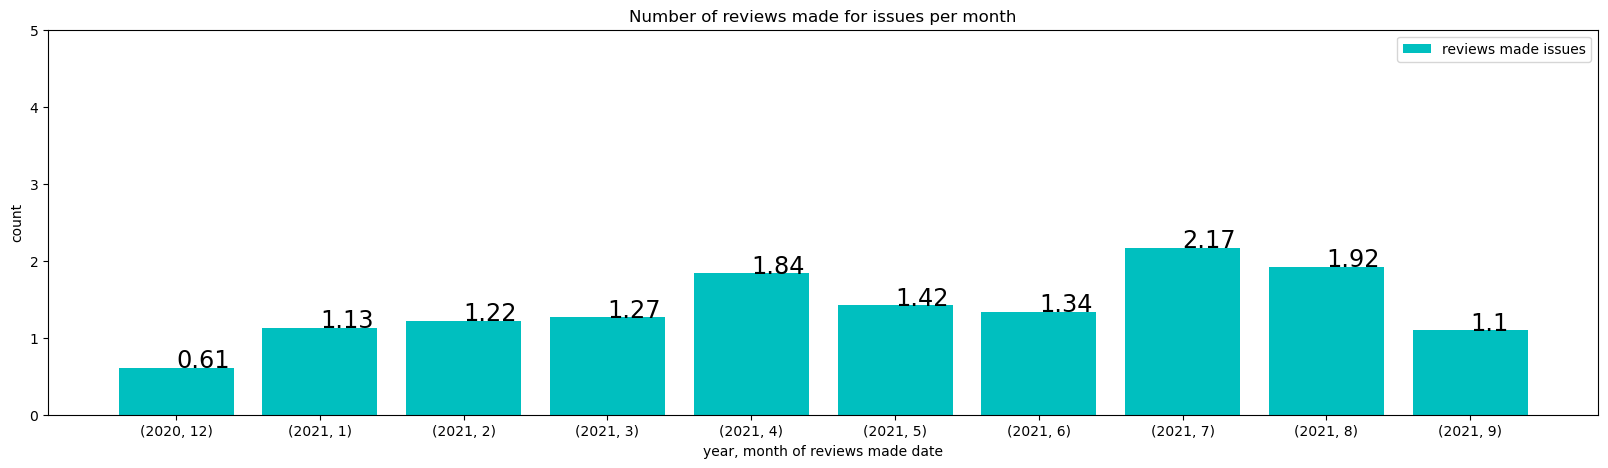

In [7]:
# Plotting
past_count = 10
base_round = 5
col_name = 'reviews made'
plt.figure(figsize=(20,5))
x = all_months
y = all_count
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} for issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()